<a href="https://colab.research.google.com/github/Santacaterina/data_analysis_project/blob/main/Venta_de_derecho_de_deposito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

In [54]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
folder = '/content/drive/MyDrive/Colab Notebooks/kaggle/bancos-bancos'
files = os.listdir(folder)
print(files)

['dataset_banco-dataset_banco.csv', 'dataset_banco_cleaned.csv', 'bancos-bancos.ipynb']


In [56]:
file_name = 'dataset_banco-dataset_banco.csv'
file_path = os.path.join(folder, file_name)
df_full = pd.read_csv(file_path)
df_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [57]:
print(df_full.shape)

(45215, 17)


In [58]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [59]:
df_full.isna().mean()*100

,0
age,0.000000
job,0.004423
marital,0.002212
education,0.002212
default,0.000000
balance,0.004423
housing,0.000000
loan,0.000000
contact,0.000000
day,0.000000


In [60]:
df_full.dropna(inplace=True)

In [61]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


Eliminacion de las columnas irrelevantes

---



In [62]:
df_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


tomando en cuenta las columnas numericas, se puede ver que std no tiene valores iguales a 0, en este caso no se elimina ninguna columna de este tipo

In [63]:
cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

In [64]:
#EBuscamos el numero de valores distintos o unicos en cada columna
for col in cols_cat:
  print(f'Column \033[1m{col}\033[0m: {df_full[col].nunique()} sublevels')

Column job: 18 sublevels
Column marital: 6 sublevels
Column education: 10 sublevels
Column default: 2 sublevels
Column housing: 2 sublevels
Column loan: 6 sublevels
Column contact: 5 sublevels
Column month: 12 sublevels
Column poutcome: 6 sublevels
Column y: 2 sublevels


En las columnas categoricas se observan que todas tienen mas de un subnivel, asi que no se elimina ninguna

Verificacion de valores repetidos

---



In [65]:
df_full.drop_duplicates(inplace=True)
df_full.shape

(45203, 17)

Deteccion de valores outliers

---



In [66]:
cols_num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

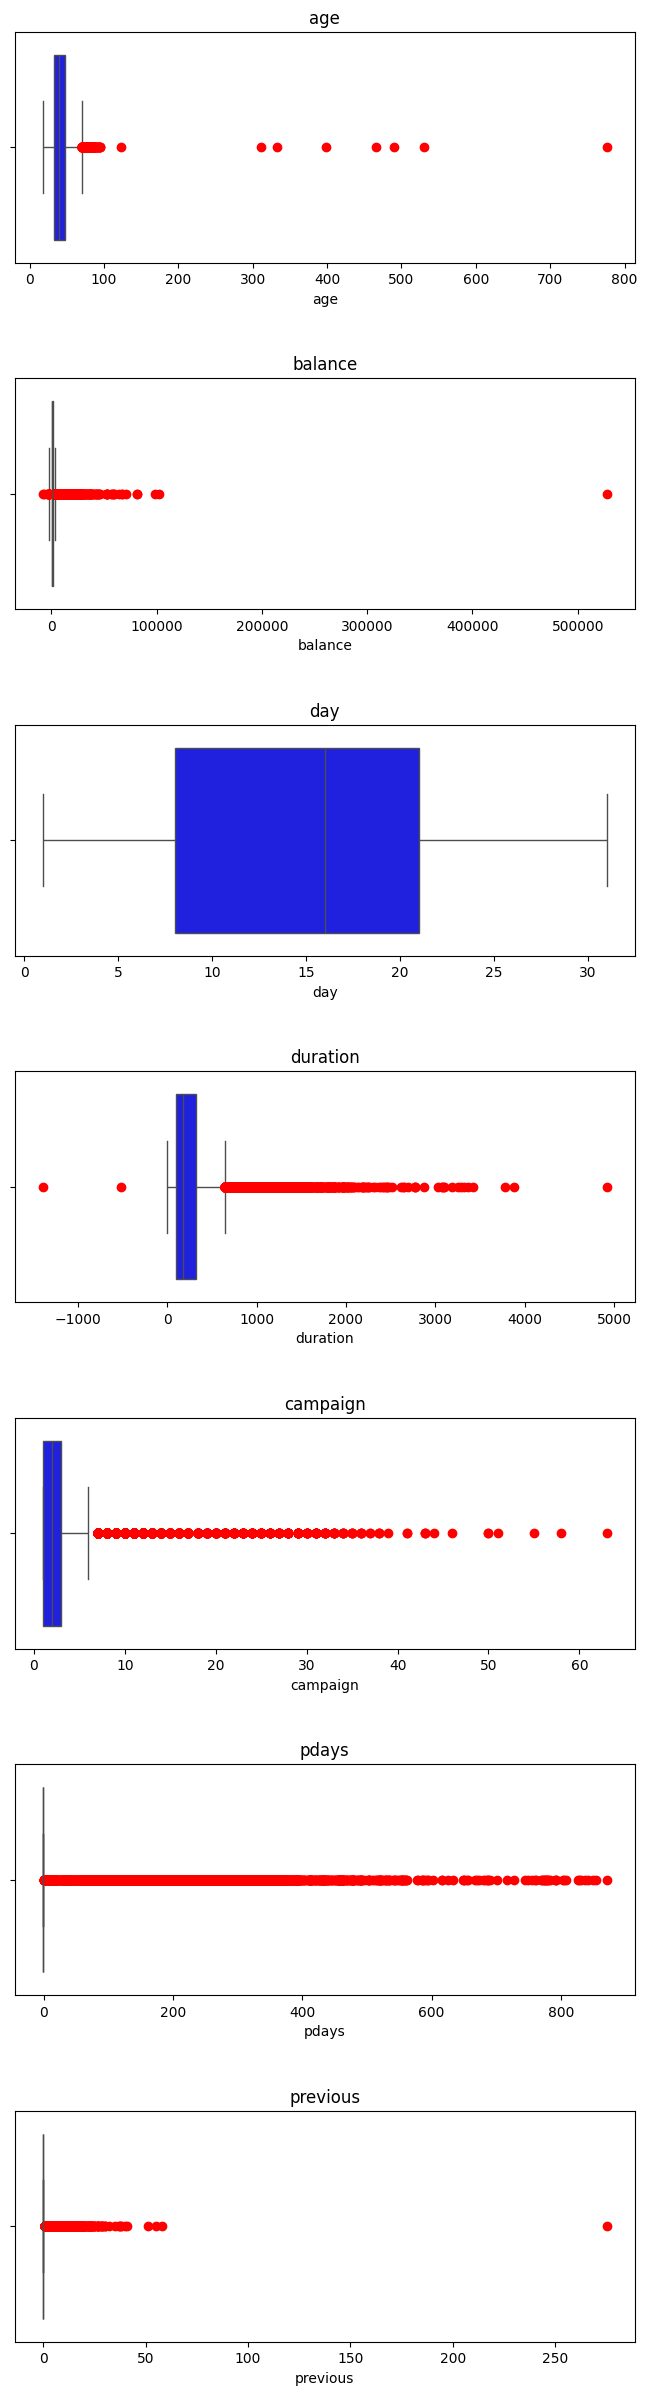

In [67]:
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

# Definir flierprops para los outliers
red_outliers = dict(markerfacecolor='red', marker='o', markeredgecolor='red')

for i, col in enumerate(cols_num):
  sns.boxplot(x=col, data=df_full, ax=ax[i], color='blue', flierprops=red_outliers)
  ax[i].set_title(col)
plt.show()

In [68]:
print(f'tamaño previo a la eliminacion de valores outliers: \033[1m{df_full.shape}\033[0m')
df_full = df_full[(df_full['age'] >= 18) & (df_full['age'] <= 100)]
print(f'tamaño despues de la eliminacion de valores outliers: \033[1m{df_full.shape}\033[0m')

tamaño previo a la eliminancion de valores outliers: (45203, 17)
tamaño despues de la eliminancion de valores outliers: (45195, 17)


In [69]:
print(f'tamaño previo a la eliminacion de valores outliers: \033[1m{df_full.shape}\033[0m')
df_full = df_full[df_full['duration'] > 0]
print(f'tamaño despues de la eliminacion de valores outliers: \033[1m{df_full.shape}\033[0m')

tamaño previo a la eliminancion de valores outliers: (45195, 17)
tamaño despues de la eliminancion de valores outliers: (45190, 17)


In [70]:
print(f'tamaño previo a la eliminacion de valores outliers: \033[1m{df_full.shape}\033[0m')
df_full = df_full[df_full['previous'] <=100]
print(f'tamaño despues de la eliminacion de valores outliers: \033[1m{df_full.shape}\033[0m')

tamaño previo a la eliminancion de valores outliers: (45190, 17)
tamaño despues de la eliminancion de valores outliers: (45189, 17)


Correcciones de errores tipograficos

---



In [71]:
for col in cols_cat:
  print(f'\033[1m{col}\033[0m')
  print(df_full[col].value_counts().to_string(header=False))
  print('-'*25)

job
blue-collar       9727
management        9451
technician        7592
admin.            5165
services          4151
retired           2262
self-employed     1577
entrepreneur      1486
unemployed        1303
housemaid         1240
student            937
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
-------------------------
marital
married     27200
single      12781
divorced     5194
div.            7
Single          4
DIVORCED        3
-------------------------
education
secondary    23181
tertiary     13297
primary       6845
unknown       1855
SECONDARY        3
Primary          2
UNK              2
sec.             2
Secondary        1
Tertiary         1
-------------------------
default
no     44374
yes      815
-------------------------
housing
yes    25111
no     20078
-------------------------
loan
no     37941
yes     7238
No         5
YES        2
NO         

Se observa que hay sub-niveles con el mismo nombre pero escritos en minúscula, en mayúscula o con la primera letra en mayúscula (por ejemplo en la variable «job» donde tenemos «self-employed» y «Self-employed» o «management» y «MANAGEMENT»).

In [72]:
#para unificar el texto en minuscula las columnas categoricas
for column in df_full.columns:
  if column in cols_cat:
    df_full[column] = df_full[column].str.lower()

Ahora se analiza cada variable de manera individual para verificar otras posibles inconsistencias:

-job: se tienen equivalencias entre "admin." y "administrative"

-marital: se tienen equivalencias entre "divorced" y "div."

-education: se tienen equivalencias entre "secondary" y "sec." y entre "unknown" y "unk."

-contact: se tienen equivalencias entre "cellular" y "mobile" y entre "telephone" y "phone"

In [73]:
df_full['job'] = df_full['job'].str.replace('admin.', 'administrative', regex=False)
df_full['marital'] = df_full['marital'].str.replace('div.', 'divorced', regex=False)
df_full['education'] = df_full['education'].str.replace('sec.', 'secondary', regex=False)
df_full['education'] = df_full['education'].replace({'unk': 'unknown'})
df_full['contact'] = df_full['contact'].str.replace('mobile', 'cellular', regex=False)
df_full['contact'] = df_full['contact'].replace({'phone': 'telephone'})
df_full['poutcome'] = df_full['poutcome'].replace({'unk': 'unknown'})

In [74]:
#Para verificar todo
for col in cols_cat:
  print(f'\033[1m{col}\033[0m')
  print(df_full[col].value_counts().to_string(header=False))
  print('-'*25)

job
blue-collar       9727
management        9455
technician        7592
administrative    5168
services          4152
retired           2263
self-employed     1578
entrepreneur      1486
unemployed        1303
housemaid         1240
student            937
unknown            288
-------------------------
marital
married     27200
single      12785
divorced     5204
-------------------------
education
secondary    23187
tertiary     13298
primary       6847
unknown       1857
-------------------------
default
no     44374
yes      815
-------------------------
housing
yes    25111
no     20078
-------------------------
loan
no     37948
yes     7241
-------------------------
contact
cellular     29274
unknown      13011
telephone     2904
-------------------------
month
may    13748
jul     6895
aug     6246
jun     5341
nov     3970
apr     2931
feb     2648
jan     1402
oct      738
sep      579
mar      477
dec      214
-------------------------
poutcome
unknown    36943
failure     

Mejora de la presentacion de las columnas

---



In [75]:
df_full.columns = [col.strip() for col in df_full.columns]
df_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [76]:
df_full.columns = df_full.columns.str.lower().str.strip().str.title()
df_full.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


Creando una nueva columna de Rentabilidad

---



In [77]:
df_full['Is_success'] = df_full['Y'].apply(lambda x: 1 if x == 'yes' else 0)
df_full.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y,Is_success
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no,0
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no,0
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no,0


In [78]:
#Se define las variables del negocio, se agregan costo de llamadas
#Para EEUU el costo operativo por llamada es entre $3-$4.5 por minutos (incluye costo linea, licencia de software y otros costos operativos)
#Para cada CDT (certificado de depósito a término) vendido se establecio un monto de $50 como ganancia para el call center

margin_cdt = 50
call_cost = 4.5

In [79]:
#Calculo del costo por llamada
df_full['Call_cost'] = (df_full['Duration']/60) * call_cost

#Utilidad por fila
df_full['Profit'] = (df_full['Is_success'] * margin_cdt) - df_full['Call_cost']
df_full

#calculo de roi por fila
df_full['ROI'] = (df_full['Profit'] / df_full['Call_cost']) * 100
df_full['ROI'] = df_full['ROI'].round(2)

In [80]:
df_full

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,...,Duration,Campaign,Pdays,Previous,Poutcome,Y,Is_success,Call_cost,Profit,ROI
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,...,261.0,1,-1.0,0,unknown,no,0,19.575,-19.575,-100.00
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,...,151.0,1,-1.0,0,unknown,no,0,11.325,-11.325,-100.00
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,...,76.0,1,-1.0,0,unknown,no,0,5.700,-5.700,-100.00
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,...,92.0,1,-1.0,0,unknown,no,0,6.900,-6.900,-100.00
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,...,198.0,1,-1.0,0,unknown,no,0,14.850,-14.850,-100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,51,technician,married,tertiary,no,825.0,no,no,cellular,17,...,977.0,3,-1.0,0,unknown,yes,1,73.275,-23.275,-31.76
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,...,456.0,2,-1.0,0,unknown,yes,1,34.200,15.800,46.20
45212,72,retired,married,secondary,no,5715.0,no,no,cellular,17,...,1127.0,5,184.0,3,success,yes,1,84.525,-34.525,-40.85
45213,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,...,508.0,4,-1.0,0,unknown,no,0,38.100,-38.100,-100.00


In [81]:
# Definir la ruta para guardar el archivo en Google Drive
output_folder = '/content/drive/MyDrive/Colab Notebooks/kaggle/bancos-bancos'
output_file_name = 'dataset_banco_cleaned.csv'
output_file_path = os.path.join(output_folder, output_file_name)

df_full.to_csv(output_file_path, index=False)



---



Calculos para la conclusion

---



Este procedimiento es solo para realizar las conclusiones debido que se desea entender los resultados

In [82]:
#tiempo promedio de una llamada en minutos para concretar una suscripción
avg_successful_duration = (df_full[df_full['Y'] == 'yes']['Duration'] / 60).mean()
print(f"{avg_successful_duration:.2f}")

8.95


In [83]:
#tiempo promedio de una llamada en minutos para ser rechazada
avg_negative_duration = (df_full[df_full['Y'] == 'no']['Duration'] / 60).mean()
print(f"{avg_negative_duration:.2f}")

3.69


In [84]:
#tiempo maximo para concretar la suscripción
max_successful_duration = (df_full[df_full['Y'] == 'yes']['Duration'] / 60).max()
print(f"{max_successful_duration:.2f}")

64.68


In [85]:
#la llamada mas larga
df_full[df_full['Duration'] == df_full['Duration'].max()]

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,...,Duration,Campaign,Pdays,Previous,Poutcome,Y,Is_success,Call_cost,Profit,ROI
24150,59,technician,married,tertiary,no,6573.0,yes,no,telephone,10,...,4918.0,1,-1.0,0,unknown,no,0,368.85,-368.85,-100.0


In [86]:
#llamada con mayor tiempo que fue satifactoria
df_successful_calls = df_full[df_full['Y'] == 'yes']
df_successful_calls[df_successful_calls['Duration'] == df_successful_calls['Duration'].max()]

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,...,Duration,Campaign,Pdays,Previous,Poutcome,Y,Is_success,Call_cost,Profit,ROI
9949,59,management,married,secondary,no,1321.0,no,no,unknown,9,...,3881.0,3,-1.0,0,unknown,yes,1,291.075,-241.075,-82.82


In [87]:
df_successful_calls

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,...,Duration,Campaign,Pdays,Previous,Poutcome,Y,Is_success,Call_cost,Profit,ROI
83,59,administrative,married,secondary,no,2343.0,yes,no,unknown,5,...,1042.0,1,-1.0,0,unknown,yes,1,78.150,-28.150,-36.02
86,56,administrative,married,secondary,no,45.0,no,no,unknown,5,...,1467.0,1,-1.0,0,unknown,yes,1,110.025,-60.025,-54.56
129,55,services,married,secondary,no,2476.0,yes,no,unknown,5,...,579.0,1,-1.0,0,unknown,yes,1,43.425,6.575,15.14
168,54,administrative,married,tertiary,no,184.0,no,no,unknown,5,...,673.0,2,-1.0,0,unknown,yes,1,50.475,-0.475,-0.94
270,42,management,single,tertiary,no,0.0,yes,yes,unknown,5,...,562.0,2,-1.0,0,unknown,yes,1,42.150,7.850,18.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,73,retired,married,secondary,no,2850.0,no,no,cellular,17,...,300.0,1,40.0,8,failure,yes,1,22.500,27.500,122.22
45209,25,technician,single,secondary,no,505.0,no,yes,cellular,17,...,386.0,2,-1.0,0,unknown,yes,1,28.950,21.050,72.71
45210,51,technician,married,tertiary,no,825.0,no,no,cellular,17,...,977.0,3,-1.0,0,unknown,yes,1,73.275,-23.275,-31.76
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,...,456.0,2,-1.0,0,unknown,yes,1,34.200,15.800,46.20


In [88]:
#llamada con mayor tiempo que fue rechazada
df_negative_calls = df_full[df_full['Y'] == 'no']
df_negative_calls[df_negative_calls['Duration'] == df_negative_calls['Duration'].max()]

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,...,Duration,Campaign,Pdays,Previous,Poutcome,Y,Is_success,Call_cost,Profit,ROI
24150,59,technician,married,tertiary,no,6573.0,yes,no,telephone,10,...,4918.0,1,-1.0,0,unknown,no,0,368.85,-368.85,-100.0


Se identifica un umbral crítico de conversión en la duración de las llamadas. Existe una correlación positiva entre el tiempo de permanencia y el éxito de la venta: el promedio de éxito se sitúa en 537 segundos (9 min) frente a los 221 segundos (3.7 min) de las llamadas fallidas.

Recomendación Estratégica: Implementar un protocolo de "Salida Inteligente" a partir de los 12 minutos. En lugar de un corte rígido, se debe capacitar a la fuerza de ventas en la detección de leads analíticos (aquellos que requieren más información pero muestran interés) vs. leads pasivos. Reducir la fricción en llamadas prolongadas sin señales de cierre optimizará el ROI por hora-hombre.

In [89]:
job = ['blue-collar', 'management', 'technician', 'administrative', 'services',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid', 'student']

In [90]:
#tasa de conversion por la columna job
for i in job:
  conversion_ok = df_full[df_full['Job'] == i]['Is_success'].mean()
  conversion_roi = (df_full[(df_full['Job'] == i) & (df_full['Is_success'] == 1)]['ROI'].mean())-100
  conversion_roi = round(conversion_roi, 2)
  print(f'\033[1m{i}\033[0m: {conversion_ok*100:.2f}% y su \033[1mROI\033[0m: {conversion_roi}')

blue-collar: 7.27% y su ROI: -40.67
management: 13.75% y su ROI: 24.33
technician: 11.05% y su ROI: 7.51
administrative: 12.21% y su ROI: 29.79
services: 8.89% y su ROI: -18.69
retired: 22.76% y su ROI: 17.0
self-employed: 11.85% y su ROI: -7.65
entrepreneur: 8.28% y su ROI: -33.32
unemployed: 15.50% y su ROI: 30.59
housemaid: 8.79% y su ROI: 9.22
student: 28.71% y su ROI: 71.58


In [91]:
#tasa de conversion por la columna job vs su balance
for i in job:
  conversion_ok = df_full[(df_full['Job'] == i) & (df_full['Balance'] < 0)]['Is_success'].mean()
  conversion_roi = (df_full[(df_full['Job'] == i) & (df_full['Is_success'] == 1)]['ROI'].mean())-100
  conversion_roi = round(conversion_roi, 2)
  print(f'\033[1m{i}\033[0m: {conversion_ok*100:.2f}% y su \033[1mROI\033[0m: {conversion_roi}')

blue-collar: 5.32% y su ROI: -40.67
management: 4.07% y su ROI: 24.33
technician: 5.04% y su ROI: 7.51
administrative: 6.30% y su ROI: 29.79
services: 6.53% y su ROI: -18.69
retired: 6.50% y su ROI: 17.0
self-employed: 7.95% y su ROI: -7.65
entrepreneur: 11.50% y su ROI: -33.32
unemployed: 4.05% y su ROI: 30.59
housemaid: 2.56% y su ROI: 9.22
student: 0.00% y su ROI: 71.58


In [92]:
conversion_minor = (df_full['Balance'] < 0).mean()
print(f"{conversion_minor*100:.2f}%")

8.33%


El análisis de conversión según el estado financiero revela que los clientes con balance negativo o cero tienen una Tasa de Conversión (CR) del 4.83% (excluyendo nichos específicos), situándose por debajo del benchmark bancario del 5.5%. No obstante, detectamos un comportamiento atípico en los segmentos 'entrepreneur' (11.50% de CR) y 'self-employed' (7.95% de CR), quienes muestran resiliencia incluso con balances negativos.

Recomendación Estratégica: Aplicar un filtro de exclusión para balances ≤ 0, con excepción de los segmentos entrepreneur y self-employed. Se recomienda descartar el segmento 'student' con saldo negativo, ya que su tasa de conversión es nula (0%).

In [93]:
#Balance por debajo del quantile 25 (tabla)
q25_value = df_full['Balance'].quantile(0.25)
conversion_q25 = (df_full['Balance'] <= q25_value).mean()
print(f"{conversion_q25*100:.2f}%")

25.04%


In [94]:
#Balance por encima del quantile 75
q75_value = df_full['Balance'].quantile(0.75)
conversion_q75 = (df_full['Balance'] >= q75_value).mean()
print(f"{conversion_q75*100:.2f}%")

25.00%


Existe una correlación directa y positiva entre el volumen de activos en cuenta (balance) y la probabilidad de suscripción. Los clientes con mayor liquidez presentan una menor resistencia a la inmovilización de capital en productos de ahorro a plazo.

In [95]:
#aceptacion con hipoteca
yes_housing = df_full[df_full['Housing'] == 'yes']['Is_success'].mean()
print(f"{yes_housing*100:.2f}%")

7.70%


In [96]:
#aceptacion sin hipoteca
no_housing = df_full[df_full['Housing'] == 'no']['Is_success'].mean()
print(f"{no_housing*100:.2f}%")

16.69%


La ausencia de pasivos hipotecarios duplica la probabilidad de contratación del CDT. Esto se debe a una mayor capacidad de ahorro discrecional y menor carga financiera mensual.

Recomendación Estratégica: Priorizar en el modelo de lead scoring a los clientes sin hipoteca para maximizar el volumen de captación, pero manteniendo un seguimiento diferenciado para clientes con hipoteca para fomentar la fidelización y el cross-selling de largo plazo.

In [97]:
#aceptacion con creditos
yes_loan = df_full[df_full['Loan'] == 'yes']['Is_success'].mean()
print(f"{yes_loan*100:.2f}%")

6.68%


In [98]:
#aceptacion con hipoteca
no_loan = df_full[df_full['Loan'] == 'no']['Is_success'].mean()
print(f"{no_loan*100:.2f}%")

12.65%


Se repite el mismo comportamiento en el caso de las hipoteca, el cliente a no tener ningun otro compromiso de pago tiende a ser mas receptivo

In [99]:
#Fechas actas para realizar las llamadas
month = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

In [100]:
for i in month:
  month_successful = df_full[df_full['Month'] == i]['Is_success'].mean()
  count_call = df_full[df_full['Month'] == i].shape[0]
  print(f'\033[1m{i}\033[0m: {month_successful*100:.2f}% vs {count_call} llamdas')

jan: 10.13% vs 1402 llamdas
feb: 16.65% vs 2648 llamdas
mar: 51.99% vs 477 llamdas
apr: 19.65% vs 2931 llamdas
may: 6.71% vs 13748 llamdas
jun: 10.22% vs 5341 llamdas
jul: 9.09% vs 6895 llamdas
aug: 11.02% vs 6246 llamdas
sep: 46.46% vs 579 llamdas
oct: 43.77% vs 738 llamdas
nov: 10.15% vs 3970 llamdas
dec: 46.73% vs 214 llamdas


Se observa una estacionalidad marcada con picos de éxito >40% en marzo, septiembre, octubre y diciembre. Por el contrario, mayo y julio muestran una ineficiencia operativa: alto volumen de llamadas con baja tasa de retorno.

Diagnóstico: Estos meses podrían estar sufriendo de fatiga de contacto o saturación de campañas concurrentes.

Recomendación Estratégica: Redistribuir el presupuesto de marketing hacia los meses de alta conversión y realizar un análisis de causa raíz sobre el bajo rendimiento de mayo para ajustar el script o la oferta comercial.

In [101]:
campaign_values = df_full['Campaign'].unique()
conversion_rates = []
for i in campaign_values:
  nro_contact = df_full[df_full['Campaign'] == i]['Is_success'].mean()
  conversion_rates.append((i, nro_contact * 100))

sorted_conversion_rates = sorted(conversion_rates, key=lambda x: x[1], reverse=True)

for campaign, rate in sorted_conversion_rates:
  print(f'\033[1m{campaign}\033[0m: {rate:.2f}%')

1: 14.59%
2: 11.20%
3: 11.20%
32: 11.11%
4: 8.98%
17: 8.70%
11: 7.96%
5: 7.88%
6: 7.13%
9: 6.42%
7: 6.39%
29: 6.25%
8: 5.94%
10: 5.26%
24: 5.00%
15: 4.82%
13: 4.51%
14: 4.30%
21: 2.86%
12: 2.58%
16: 2.53%
20: 2.33%
19: 0.00%
18: 0.00%
22: 0.00%
25: 0.00%
43: 0.00%
51: 0.00%
63: 0.00%
41: 0.00%
26: 0.00%
28: 0.00%
55: 0.00%
50: 0.00%
38: 0.00%
23: 0.00%
31: 0.00%
37: 0.00%
30: 0.00%
46: 0.00%
27: 0.00%
58: 0.00%
33: 0.00%
35: 0.00%
34: 0.00%
36: 0.00%
39: 0.00%
44: 0.00%


In [102]:
# ROI promedio para llamadas con más de 4 llamdas
roi_more_than_4_calls = df_full[df_full['Campaign'] > 4]['Profit'].mean()
print(f"ROI promedio para más de 4 contactos: {roi_more_than_4_calls:.2f}")

if roi_more_than_4_calls < 0:
    print("El ROI es negativo al llamar más de 4 veces.")
else:
    print("El ROI no es negativo al llamar más de 4 veces.")

ROI promedio para más de 4 contactos: -12.21
El ROI es negativo al llamar más de 4 veces.


El análisis de frecuencia indica que la probabilidad de éxito marginal se desploma después del tercer intento. Realizar más de 3 llamadas al mismo cliente resulta en un ROI negativo, ya que el costo operativo supera la probabilidad estadística de cierre.

Recomendación: Establecer un límite de contacto (Hard Cap) de 3 intentos por campaña.

Aplicando Estrategias

---



In [131]:
#Se elimina clientes con balances en 0 o negativos, un máximo de 3 llamadas, y clientes que no dejaron de pagar sus compromisos (default)
df_opt=df_full[(df_full['Balance'] > 0) & (df_full['Campaign'] <= 3) & (df_full['Default'] == "no")].copy()
df_opt

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,...,Duration,Campaign,Pdays,Previous,Poutcome,Y,Is_success,Call_cost,Profit,ROI
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,...,261.0,1,-1.0,0,unknown,no,0,19.575,-19.575,-100.00
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,...,151.0,1,-1.0,0,unknown,no,0,11.325,-11.325,-100.00
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,...,76.0,1,-1.0,0,unknown,no,0,5.700,-5.700,-100.00
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,...,92.0,1,-1.0,0,unknown,no,0,6.900,-6.900,-100.00
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,...,198.0,1,-1.0,0,unknown,no,0,14.850,-14.850,-100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,73,retired,married,secondary,no,2850.0,no,no,cellular,17,...,300.0,1,40.0,8,failure,yes,1,22.500,27.500,122.22
45209,25,technician,single,secondary,no,505.0,no,yes,cellular,17,...,386.0,2,-1.0,0,unknown,yes,1,28.950,21.050,72.71
45210,51,technician,married,tertiary,no,825.0,no,no,cellular,17,...,977.0,3,-1.0,0,unknown,yes,1,73.275,-23.275,-31.76
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,...,456.0,2,-1.0,0,unknown,yes,1,34.200,15.800,46.20


Recomendacion 1: Solo llamando a cliente con balance >0, y no mas de 3 llamadas

---



In [119]:
total_cost_full = df_full['Call_cost'].sum() #Costo total de la operacion

In [120]:
total_cost_opt_1 = df_opt['Call_cost'].sum() #Costo total de las llamadas que fueron exitosas

savings_balance = total_cost_full - total_cost_opt_1 #Ahorro absoluto

spending_reduction_percentage = (savings_balance / total_cost_full) * 100 #Reducción del gasto porcentual

print(f"Costo total de llamadas (Total): ${total_cost_full:.2f}")
print(f"Costo total de llamadas (Exitosas): ${total_cost_opt_1:.2f}")
print(f"Ahorro operativo absoluto: ${savings_balance:.2f}")
print(f"Reducción de gasto operativa: {spending_reduction_percentage:.2f}%")

Costo total de llamadas (Total): $874796.93
Costo total de llamadas (Exitosas): $601569.07
Ahorro operativo absoluto: $273227.85
Reducción de gasto operativa: 31.23%


La exclusión técnica de cuentas con saldo cero o negativo representa una reducción inmediata del 31.23% en el Gasto Operativo (OPEX), permitiendo a la agencia centrar sus recursos en segmentos con mayor capacidad de inversión.

Recomendacion 2: Solo llamando a clientes con balance > 0 exepto por algunos job y no mas de 3 llamadas

---



In [121]:
condition_campaign = df_full['Campaign'] <= 3
condition_balance_positive = df_full['Balance'] > 0
condition_special_jobs = (df_full['Job'] == 'entrepreneur') | (df_full['Job'] == 'self-employed')

df_opt_2 = df_full[condition_campaign & (condition_balance_positive | condition_special_jobs)].copy()
df_opt_2

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,...,Duration,Campaign,Pdays,Previous,Poutcome,Y,Is_success,Call_cost,Profit,ROI
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,...,261.0,1,-1.0,0,unknown,no,0,19.575,-19.575,-100.00
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,...,151.0,1,-1.0,0,unknown,no,0,11.325,-11.325,-100.00
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,...,76.0,1,-1.0,0,unknown,no,0,5.700,-5.700,-100.00
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,...,92.0,1,-1.0,0,unknown,no,0,6.900,-6.900,-100.00
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,...,198.0,1,-1.0,0,unknown,no,0,14.850,-14.850,-100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,73,retired,married,secondary,no,2850.0,no,no,cellular,17,...,300.0,1,40.0,8,failure,yes,1,22.500,27.500,122.22
45209,25,technician,single,secondary,no,505.0,no,yes,cellular,17,...,386.0,2,-1.0,0,unknown,yes,1,28.950,21.050,72.71
45210,51,technician,married,tertiary,no,825.0,no,no,cellular,17,...,977.0,3,-1.0,0,unknown,yes,1,73.275,-23.275,-31.76
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,...,456.0,2,-1.0,0,unknown,yes,1,34.200,15.800,46.20


In [122]:
total_cost_opt_1_1 = df_opt_2['Call_cost'].sum() #Costo total de las llamadas que fueron exitosas

savings_balance_job = total_cost_full - total_cost_opt_1_1 #Ahorro absoluto

spending_reduction= (savings_balance_job / total_cost_full) * 100 #Reducción del gasto porcentual

print(f"Costo total de llamadas (Total): ${total_cost_full:.2f}")
print(f"Costo total de llamadas (Exitosas): ${total_cost_opt_1_1:.2f}")
print(f"Ahorro operativo absoluto: ${savings_balance_job:.2f}")
print(f"Reducción de gasto operativa: {spending_reduction:.2f}%")

Costo total de llamadas (Total): $874796.93
Costo total de llamadas (Exitosas): $613182.15
Ahorro operativo absoluto: $261614.78
Reducción de gasto operativa: 29.91%


Esta estrategia no varia mucho de la anterior a diferencia que se agrega a los entrepreneur y self-employed debido que a pesar de tener un balance ≤0 se tiene una aceptación de los certificados de depósito dando una reducción de los gastos operación en un 29.91% pero aumenta el numero de clientes a llamar

Recomendacion 3: Llamando a clientes con un job optimo

---



In [123]:
job_opt = ['management', 'technician', 'administrative',
       'retired', 'unemployed', 'housemaid', 'student']

In [124]:
total_cost_opt_2 = 0

for i in job_opt:
  cost_for_current_job = df_opt[(df_opt['Job'] == i) & (df_opt['Is_success'] == 1)]['Call_cost'].sum()
  total_cost_opt_2 += cost_for_current_job

savings_job = total_cost_full - total_cost_opt_2 #Ahorro absoluto

spending_reduction_percentage_2 = (savings_job / total_cost_full) * 100 #Reducción del gasto porcentual

print(f"Costo total de llamadas (Total): ${total_cost_full:.2f}")
print(f"Costo total de llamadas (Exitosas para jobs óptimos): ${total_cost_opt_2:.2f}")
print(f"Ahorro operativo absoluto: ${savings_job:.2f}")
print(f"Reducción de gasto operativa: {spending_reduction_percentage_2:.2f}%")

Costo total de llamadas (Total): $874796.93
Costo total de llamadas (Exitosas para jobs óptimos): $108670.12
Ahorro operativo absoluto: $766126.80
Reducción de gasto operativa: 87.58%


Si se restringe la campaña únicamente a los perfiles laborales con histórico de ROI positivo (excluyendo blue-collar, services, etc.), se logra una máxima eficiencia en costos, aunque esto implica una reducción del alcance total del embudo de ventas.

Recomendacion 4: Llamando a clientes solo los meses mas optimos

---



In [125]:
month_opt = ['feb', 'mar', 'apr', 'jun', 'aug', 'sep', 'oct', 'dec']

In [126]:
total_cost_opt_3 = 0

for i in month_opt:
  cost_for_current_month = df_opt[(df_opt['Month'] == i) & (df_opt['Is_success'] == 1)]['Call_cost'].sum()
  total_cost_opt_3 += cost_for_current_month

savings_month = total_cost_full - total_cost_opt_3 #Ahorro absoluto

spending_reduction_percentage_3 = (savings_month / total_cost_full) * 100 #Reducción del gasto porcentual

print(f"Costo total de llamadas (Total): ${total_cost_full:.2f}")
print(f"Costo total de llamadas (Exitosas para meses óptimos): ${total_cost_opt_3:.2f}")
print(f"Ahorro operativo absoluto: ${savings_month:.2f}")
print(f"Reducción de gasto operativa: {spending_reduction_percentage_3:.2f}%")

Costo total de llamadas (Total): $874796.93
Costo total de llamadas (Exitosas para meses óptimos): $83493.38
Ahorro operativo absoluto: $791303.55
Reducción de gasto operativa: 90.46%


Limitar la operación exclusivamente a los meses de mayor aceptación (Feb, Mar, Abr, Jun, Ago, Sep, Oct, Dic) permitiría una reducción drástica de costos operativos del 90.46%, convirtiendo la campaña en una operación quirúrgica de alta rentabilidad.

Recomendacion 5: Tomando en cuenta todas las recomendaciones

---



In [127]:
#Aplicando todas las recomendaciones: balance > 0, campaign <= 3, job óptimo y mes óptimo
df_final_opt = df_opt[(df_opt['Job'].isin(job_opt)) & (df_opt['Month'].isin(month_opt))].copy()
df_final_opt

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,...,Duration,Campaign,Pdays,Previous,Poutcome,Y,Is_success,Call_cost,Profit,ROI
7960,49,technician,married,secondary,no,6312.0,yes,no,unknown,2,...,93.0,2,-1.0,0,unknown,no,0,6.975,-6.975,-100.00
7961,59,management,married,primary,no,396.0,yes,no,unknown,2,...,72.0,3,-1.0,0,unknown,no,0,5.400,-5.400,-100.00
7963,37,management,married,tertiary,no,34.0,yes,no,unknown,2,...,100.0,2,-1.0,0,unknown,no,0,7.500,-7.500,-100.00
7965,58,retired,married,secondary,no,25.0,yes,no,unknown,2,...,132.0,2,-1.0,0,unknown,no,0,9.900,-9.900,-100.00
7967,40,technician,married,secondary,no,335.0,yes,no,unknown,2,...,140.0,3,-1.0,0,unknown,no,0,10.500,-10.500,-100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45131,23,unemployed,single,tertiary,no,993.0,no,no,cellular,27,...,409.0,1,91.0,4,success,no,0,30.675,-30.675,-100.00
45132,46,technician,married,unknown,no,3308.0,no,no,cellular,27,...,171.0,1,91.0,2,success,yes,1,12.825,37.175,289.86
45133,33,technician,married,secondary,no,5083.0,no,no,cellular,27,...,161.0,1,96.0,2,other,no,0,12.075,-12.075,-100.00
45135,61,retired,married,secondary,no,1058.0,no,no,cellular,27,...,277.0,1,92.0,5,success,no,0,20.775,-20.775,-100.00


In [128]:
#Calcular el costo total de las llamadas exitosas en este escenario optimizado
total_cost_opt_final = df_final_opt[df_final_opt['Is_success'] == 1]['Call_cost'].sum()

savings_final = total_cost_full - total_cost_opt_final #Ahorro absoluto

spending_reduction_percentage_final = (savings_final / total_cost_full) * 100 #Reducción del gasto porcentual

print(f"Costo total de llamadas (Original): ${total_cost_full:.2f}")
print(f"Costo total de llamadas (Escenario Optimizado Combinado): ${total_cost_opt_final:.2f}")
print(f"Ahorro operativo absoluto (Combinado): ${savings_final:.2f}")
print(f"Reducción de gasto operativa (Combinada): {spending_reduction_percentage_final:.2f}%")

Costo total de llamadas (Original): $874796.93
Costo total de llamadas (Escenario Optimizado Combinado): $63545.10
Ahorro operativo absoluto (Combinado): $811251.83
Reducción de gasto operativa (Combinada): 92.74%


Aplicando todos los filtros o estrategias se tiene una reducción de los gastos operativos en un 92.74% que eso es un gran valor pero solo se llega a pocos clientes

Recomendacion final

---



Aplicar todos los filtros de manera simultánea reduciría la base de datos de 45,189 a solo 8,861 registros. Si bien esto es "hiper-eficiente", pone en riesgo el Brand Awareness y la captación de futuros clientes.

Recomendación Final: Optar por un modelo híbrido especificamente mi recomendacion 2 que seria excluir saldos ≤ 0 (salvando a entrepreneur (priorizando este) y self-employed) y limitar a 3 intentos de llamada. Esta estrategia logra una reducción de costos del 29.91% manteniendo una base amplia de 30,336 clientes potenciales. Esto garantiza la salud financiera de la campaña hoy, sin sacrificar la cuota de mercado ni la visibilidad del banco a futuro.